In [12]:
import matplotlib.pyplot as plt
import numpy as np
import m6_helpers
from pylbm import lbm

In [15]:
x_dim = 300
y_dim = 300
epochs = 100000
omega = 1.7
top_vel = .1
print("Reynolds number is: {}", lbm.reynolds(x_dim,omega,top_vel))
print_epoch = 10000

Reynolds number is: {} 1019.9999999999998


In [14]:
r_xy = lbm.density_init(x_dim=x_dim, y_dim=y_dim, r_mean=1.0, eps=0.0)
u_axy = lbm.local_avg_velocity_init(x_dim=x_dim, y_dim=y_dim, u_mean=0.0, eps=0.0)
f_cxy = lbm.f_eq(u_axy=u_axy, r_xy=r_xy)

velocities = []
print_epoch = 10000
for t in range(epochs):
    if t % print_epoch - 1 == 0:
        velocities.append(u_axy)
    f_cxy = lbm.stream(f_cxy=f_cxy)

    f_cxy = lbm.apply_bottom_wall(f_cxy=f_cxy)
    f_cxy = lbm.left_wall(f_cxy=f_cxy)
    f_cxy = lbm.right_wall(f_cxy=f_cxy)
    
    f_cxy = lbm.apply_sliding_top_wall_simple(f_cxy=f_cxy, velocity=top_vel)

    f_cxy, u_axy = lbm.collision(f_cxy=f_cxy, omega=omega)

In [25]:
path = "./m6_vel_10000.npy"
overwrite = False
if overwrite:
    np.save(path, velocities)
velocities = np.load(path)


In [26]:
lbm.reynolds(y_dim=y_dim, omega=omega, top_vel=top_vel)

1019.9999999999998

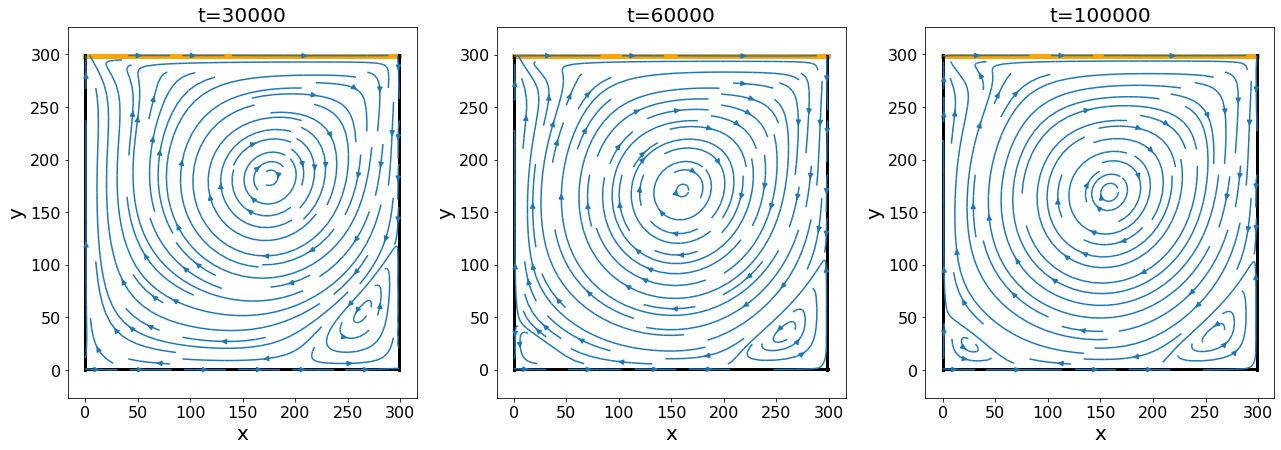

In [47]:
font_size = 20
plt.rc('font', size=16) 
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)

velocities = np.load('./vels.npy')

fig = plt.figure(figsize=(30,30))
plt.axis('off')
num_figs = 3
plot_num = 1
for i, t in enumerate([30,60,100]):
    v = velocities[t-1]
    ax = plt.subplot(5, 5, plot_num)
    # ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 0.5, color="black", linewidth=3.0)
    ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 1.5, color="orange", linewidth=5.0)
    ax.plot(np.arange(x_dim), np.zeros((x_dim)) + 0.5, color="black", linewidth=3.0)
    ax.plot(np.zeros(y_dim) + 0.5, np.arange((y_dim)), color="black", linewidth=3.0)
    ax.plot(np.zeros(y_dim) + x_dim - 1.5, np.arange((y_dim)), color="black", linewidth=3.0)
    # ax.set_xticks(np.arange(0, x_dim, x_dim / 10))
    # ax.set_yticks(np.arange(0, y_dim, y_dim / 10))
    # ax.grid(True)
    ax.axis("equal")
    # streamplot is really slow at big grids
    strm = ax.streamplot(np.arange(x_dim), np.arange(y_dim), v[0, :, :].T, v[1, :, :].T, cmap="autumn")
    # fig.colorbar(strm.lines)
    ax.set_title("t={}".format((t)*1000))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plot_num += 1
    fig.add_axes(ax)

lbm.save_fig(fig, 'm6-1.pgf')
plt.tight_layout()
plt.show()
plt.close()

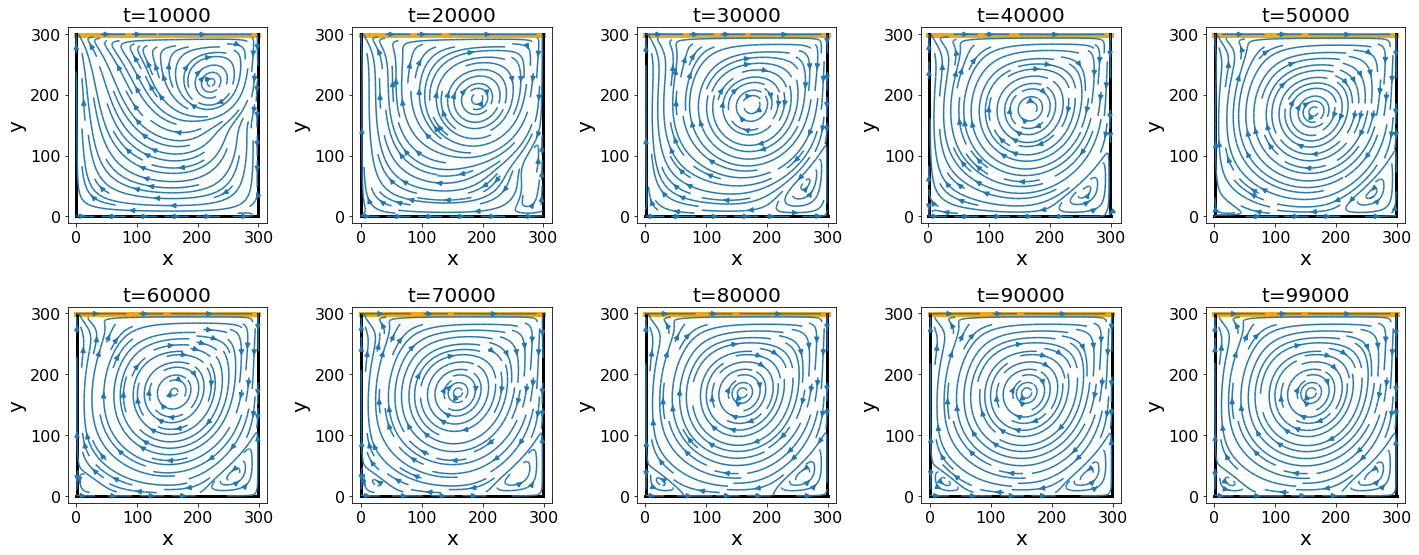

In [84]:
fig, ax = plt.subplots(figsize=(20,8))
plt.axis('off')
axs = fig.subplots(nrows=2, ncols=5)


times =  (np.arange(10)+1)*10
times[-1] = 99
for i, t in enumerate(times):
    if i / 5 < 1:
        ax = axs[0, i%5]
    else:
        ax = axs[1, i%5]
    v = velocities[t]
    # ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 0.5, color="black", linewidth=3.0)
    ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 1.5, color="orange", linewidth=5.0)
    ax.plot(np.arange(x_dim), np.zeros((x_dim)) + 0.5, color="black", linewidth=3.0)
    ax.plot(np.zeros(y_dim) + 0.5, np.arange((y_dim)), color="black", linewidth=3.0)
    ax.plot(np.zeros(y_dim) + x_dim - 1.5, np.arange((y_dim)), color="black", linewidth=3.0)
    ax.axis("equal")
    strm = ax.streamplot(np.arange(x_dim), np.arange(y_dim), v[0, :, :].T, v[1, :, :].T, cmap="autumn")
    ax.set_title("t={}".format((t)*1000))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plot_num += 1
    fig.add_axes(ax)

plt.tight_layout()
lbm.save_fig(fig, 'm6-1-vels.png')
plt.show()
plt.close()

In [49]:
def animate(t):
    v = velocities[t-1]
    ax = plt.subplot(5, 5, plot_num)
    # ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 0.5, color="black", linewidth=3.0)
    ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 1.5, color="orange", linewidth=5.0)
    ax.plot(np.arange(x_dim), np.zeros((x_dim)) + 0.5, color="black", linewidth=3.0)
    ax.plot(np.zeros(y_dim) + 0.5, np.arange((y_dim)), color="black", linewidth=3.0)
    ax.plot(np.zeros(y_dim) + x_dim - 1.5, np.arange((y_dim)), color="black", linewidth=3.0)
    # ax.set_xticks(np.arange(0, x_dim, x_dim / 10))
    # ax.set_yticks(np.arange(0, y_dim, y_dim / 10))
    # ax.grid(True)
    ax.axis("equal")
    # streamplot is really slow at big grids
    strm = ax.streamplot(np.arange(x_dim), np.arange(y_dim), v[0, :, :].T, v[1, :, :].T, cmap="autumn")
    # fig.colorbar(strm.lines)
    # ax.set_title("t={}".format((t)*1000))
    ax.set_xlabel("x")
    ax.set_ylabel("y")

/home/joe/miniconda3/envs/high/lib/python3.9/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


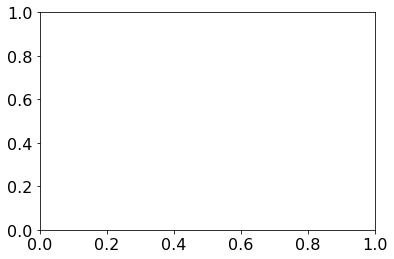

In [51]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ani = FuncAnimation(fig, animate, frames=5, interval=100, repeat=False)

In [77]:
import matplotlib.pyplot as plt
import numpy as np

x_dim = 300
y_dim = 300
epochs = 100000
omega = 1.7
top_vel = 0.1
velocities = np.load(path)


for t in range(100):
    fig, ax = plt.subplots(figsize=(7,5))
    v = velocities[t]
    # ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 0.5, color="black", linewidth=3.0)
    ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 1.5, color="orange", linewidth=5.0)
    ax.plot(np.arange(x_dim), np.zeros((x_dim)) + 0.5, color="black", linewidth=3.0)
    ax.plot(np.zeros(y_dim) + 0.5, np.arange((y_dim)), color="black", linewidth=3.0)
    ax.plot(np.zeros(y_dim) + x_dim - 1.5, np.arange((y_dim)), color="black", linewidth=3.0)
    ax.axis("equal")
    strm = ax.streamplot(np.arange(x_dim), np.arange(y_dim), v[0, :, :].T, v[1, :, :].T, cmap="autumn")
    ax.set_title("t={}".format((t)*1000))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    fig.savefig(lbm.REPO_DIR + "/milestones/final/ani/ani-{}.png".format(t+1))
    # plt.show()
    plt.close()

t=99
fig, ax = plt.subplots(figsize=(7,5))
v = velocities[-1]
# ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 0.5, color="black", linewidth=3.0)
ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 1.5, color="orange", linewidth=5.0)
ax.plot(np.arange(x_dim), np.zeros((x_dim)) + 0.5, color="black", linewidth=3.0)
ax.plot(np.zeros(y_dim) + 0.5, np.arange((y_dim)), color="black", linewidth=3.0)
ax.plot(np.zeros(y_dim) + x_dim - 1.5, np.arange((y_dim)), color="black", linewidth=3.0)
ax.axis("equal")
strm = ax.streamplot(np.arange(x_dim), np.arange(y_dim), v[0, :, :].T, v[1, :, :].T, cmap="autumn")
ax.set_title("t={}".format((t)*1000))
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.savefig(lbm.REPO_DIR + "/milestones/final/ani/ani-0.png")
# plt.show()
plt.close()


